# Libraries

In [4]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

# Random data

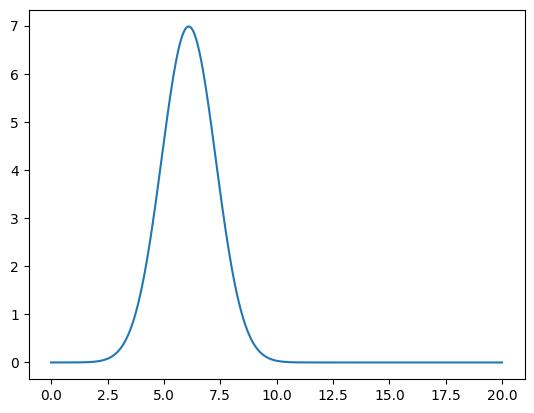

In [ ]:
np.random.seed(42)
x = np.linspace(0, 20.0, 1001)
data = (gaussian(x, 21, 6.1, 1.2)) 
plt.plot(x, data);
plt.savefig("gaussian.png")